In [1]:
import numpy as np
import cv2
from sklearn import linear_model
import scipy.misc
from matplotlib import pyplot as plt


class KSVD(object):
    def __init__(self, n_components, max_iter=30, tol=1e-6,
                 n_nonzero_coefs=None):
        """
        稀疏模型Y = DX，Y为样本矩阵，使用KSVD动态更新字典矩阵D和稀疏矩阵X
        :param n_components: 字典所含原子个数（字典的列数）
        :param max_iter: 最大迭代次数
        :param tol: 稀疏表示结果的容差
        :param n_nonzero_coefs: 稀疏度
        """
        self.dictionary = None
        self.sparsecode = None
        self.max_iter = max_iter
        self.tol = tol
        self.n_components = n_components
        self.n_nonzero_coefs = n_nonzero_coefs

    def _initialize(self, y):
        """
        初始化字典矩阵
        """
        u, s, v = np.linalg.svd(y)
        self.dictionary = u[:, :self.n_components]

    def _update_dict(self, y, d, x):
        """
        使用KSVD更新字典的过程
        """
        for i in range(self.n_components):
            index = np.nonzero(x[i, :])[0]
            if len(index) == 0:
                continue

            d[:, i] = 0
            r = (y - np.dot(d, x))[:, index]
            u, s, v = np.linalg.svd(r, full_matrices=False)
            d[:, i] = u[:, 0].T
            x[i, index] = s[0] * v[0, :]
        return d, x

    def fit(self, y):
        """
        KSVD迭代过程
        """
        self._initialize(y)
        for i in range(self.max_iter):
            x = linear_model.orthogonal_mp(self.dictionary, y, n_nonzero_coefs=self.n_nonzero_coefs)
            e = np.linalg.norm(y - np.dot(self.dictionary, x))
            print('第%s次迭代，误差为：%s' %(i, e))
            if e < self.tol:
                break
            self._update_dict(y, self.dictionary, x)

        self.sparsecode = linear_model.orthogonal_mp(self.dictionary, y, n_nonzero_coefs=self.n_nonzero_coefs)
        return self.dictionary, self.sparsecode
    
    @staticmethod
    #计算PSNR值
    def psnr(A, B):
        if (A==B).all(): return 0
        return 10*np.log10(255*255.0/(((A.astype(np.float)-B)**2).mean()))

In [2]:
im_ascent = scipy.misc.ascent().astype(np.float)

In [3]:
ksvd = KSVD(1024)
dictionary, sparsecode = ksvd.fit(im_ascent)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(im_ascent)
plt.subplot(1, 2, 2)
restruct = dictionary.dot(sparsecode)
plt.imshow(restruct)
plt.show()

第0次迭代，误差为：4474.019820205429


IndexError: index 512 is out of bounds for axis 0 with size 512

In [9]:
print(im_ascent.shape)

(512, 512)


In [8]:
restruct = dictionary.dot(sparsecode)
print(restruct.shape)

(512, 512)


In [12]:
clock1_origin = cv2.imread("./images/Clock1.png",0).astype(np.uint8)

In [20]:
ksvd = KSVD(256)
dictionary, sparsecode = ksvd.fit(clock1_origin)

第0次迭代，误差为：732.5483892328244
第1次迭代，误差为：583.0956393457179
第2次迭代，误差为：514.7903504541832
第3次迭代，误差为：472.1494830608098
第4次迭代，误差为：442.2597924784203
第5次迭代，误差为：411.9161003512398
第6次迭代，误差为：390.0341386420385
第7次迭代，误差为：374.4571831282354
第8次迭代，误差为：361.85688629928393
第9次迭代，误差为：352.2543350084168
第10次迭代，误差为：343.5024448154784
第11次迭代，误差为：335.86610198661936
第12次迭代，误差为：329.70569542399727
第13次迭代，误差为：322.8833939335622
第14次迭代，误差为：317.20753670416923
第15次迭代，误差为：310.9888534614191
第16次迭代，误差为：305.47062313361647
第17次迭代，误差为：296.07359104369476
第18次迭代，误差为：290.45386588966306
第19次迭代，误差为：286.0511680969408
第20次迭代，误差为：282.656293952051
第21次迭代，误差为：278.5876356332244
第22次迭代，误差为：275.1287910352862
第23次迭代，误差为：273.1060123041077
第24次迭代，误差为：269.4209282340343
第25次迭代，误差为：266.53618949572734
第26次迭代，误差为：264.45310733310816
第27次迭代，误差为：260.45752838372937
第28次迭代，误差为：261.53034655543587
第29次迭代，误差为：257.6960889150243


In [21]:
restruct = dictionary.dot(sparsecode)
print(restruct.shape)

(256, 256)


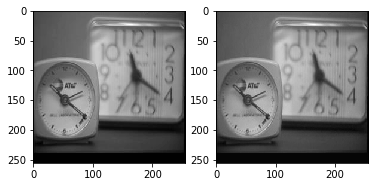

In [22]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(clock1_origin, plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(restruct, plt.cm.gray)
plt.show()

In [26]:
KSVD.psnr(clock1_origin, restruct)

48.39345870352216

In [30]:
a = [0,2,3,0,1]
b = np.nonzero(a)
print(np.array(b).size)
print(b)

3
(array([1, 2, 4]),)
